In [1]:
import pandas as pd

df = pd.read_csv("../../ressource/data/output.csv")
print(df)


      trackID   class  frame  xmin  ymin  xmax  ymax      time         date
0           1  person      3   242   789   363  1080  23:22:11  02|Dec|2020
1           2  person      3   717   223   783   409  23:22:11  02|Dec|2020
2           3  person      3  1605   611  1715   864  23:22:11  02|Dec|2020
3           4  person      3   882    73   947   228  23:22:11  02|Dec|2020
4           5  person      3   803   239   858   417  23:22:11  02|Dec|2020
...       ...     ...    ...   ...   ...   ...   ...       ...          ...
6065       35  person    302  1536   706  1645   979  23:23:41  02|Dec|2020
6066       40  person    302   235   305   317   492  23:23:41  02|Dec|2020
6067       41  person    302  1162     0  1210    53  23:23:41  02|Dec|2020
6068       42  person    302   871   933  1112  1079  23:23:41  02|Dec|2020
6069       43  person    302    25   573    81   807  23:23:41  02|Dec|2020

[6070 rows x 9 columns]


## Trajectoire moyenne

## Pré-traitement des données
### Nettoyage

In [2]:
df.dropna(inplace=True)

### Normalisation

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Pour supprimer une colonne df_t = df.drop(columns=['class'])

#scaler = MinMaxScaler()
#df[['xmin', 'ymin', 'xmax', 'ymax']] = scaler.fit_transform(df[['xmin', 'ymin', 'xmax', 'ymax']])

df.describe()

,trackID,frame,xmin,ymin,xmax,ymax
count,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000
mean,14.226030,143.145305,1035.738386,297.869522,1117.291269,463.737727
std,11.522277,90.935931,470.595088,312.517990,467.227692,351.222469
min,1.000000,3.000000,-15.000000,-1.000000,42.000000,19.000000
25%,5.000000,57.000000,773.000000,28.000000,868.250000,169.000000
50%,12.000000,142.000000,1088.000000,160.000000,1144.000000,318.000000
75%,19.000000,223.000000,1403.000000,522.750000,1487.750000,761.000000
max,43.000000,302.000000,1818.000000,1033.000000,1892.000000,1082.000000


### Matrice de données pour la carte de chaleur 

Créer une nouvelle dataframe avec x, y et count
x et y constituent des micro-périmètres et count est le nombre de personnes passées dans ces périmètres


In [4]:
matrix = pd.DataFrame()
matrix['xpos'] = (df['xmax'] + df['xmin']) / 2
matrix['ypos'] = (df['ymax'] + df['ymin']) / 2

matrix.describe()

,xpos,ypos
count,6070.000000,6070.000000
mean,1076.514827,380.803624
std,468.493059,331.074226
min,25.000000,9.500000
25%,816.500000,97.000000
50%,1116.500000,239.500000
75%,1457.750000,642.875000
max,1855.000000,1056.500000


In [5]:
import numpy as np

m = pd.DataFrame()
m['x'] = np.arange(0,1.1, 0.1)
m['y'] = np.arange(0,1.1, 0.1)
m['count'] = 0

test = pd.DataFrame()
test['xpos'] = [0.05, 0.65, 0.67, 0.12]
test['ypos'] = [0.05, 0.65, 0.67, 0.12]

In [6]:
a = np.array([])
b = np.array([])

for i in m.index:
   if((i-1) >= 0):
      maskX = (matrix['xpos'] < m['x'][i]) & (matrix['xpos'] >= m['x'][i-1]) 
      maskY = (matrix['ypos'] < m['y'][i]) & (matrix['ypos'] >= m['y'][i-1])

      countX = matrix[maskX].count()
      countY = matrix[maskY].count()

      a = np.append(a, countX[0])
      b = np.append(b, countY[0])
    
a = np.append(a, sum(a))
b = np.append(b, sum(b))

m['countX'] = a
m['countY'] = b
m

,x,y,count,countX,countY
0,0.0,0.0,0,0.0,0.0
1,0.1,0.1,0,0.0,0.0
2,0.2,0.2,0,0.0,0.0
3,0.3,0.3,0,0.0,0.0
4,0.4,0.4,0,0.0,0.0
5,0.5,0.5,0,0.0,0.0
6,0.6,0.6,0,0.0,0.0
7,0.7,0.7,0,0.0,0.0
8,0.8,0.8,0,0.0,0.0
9,0.9,0.9,0,0.0,0.0


## Heatmap test

In [7]:
import numpy as np 

uniform_data = np.random.rand(4, 6)
uniform_data

array([[0.44897908, 0.26280535, 0.16905526, 0.04701404, 0.50243054,
        0.00125765],
       [0.95336965, 0.07187068, 0.3753695 , 0.18812864, 0.78977356,
        0.96669414],
       [0.92261895, 0.48552497, 0.0986459 , 0.46713948, 0.25857497,
        0.51190866],
       [0.48485004, 0.26369022, 0.73487806, 0.75972376, 0.87134648,
        0.88694755]])

<AxesSubplot:>

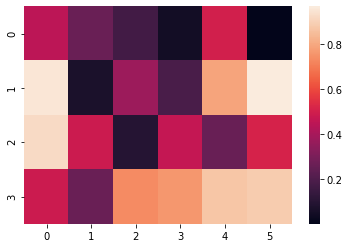

In [8]:
import seaborn as sb
import numpy as np
sb.heatmap(uniform_data)

<AxesSubplot:>

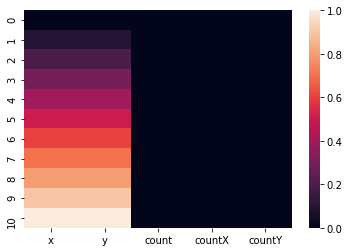

In [9]:
htest = pd.DataFrame(m, columns =['x', 'y', 'countX']) 

sb.heatmap(m)

In [10]:
# ---------------- LN HELL ZONE -------------------

a = np.array([])

for i in m.index:
    if((i-1) >= 0):
        for j in m.index:
            if((j-1) >= 0):
                mask = (matrix['xpos'] < m['x'][i] ) & (matrix['xpos'] >= m['x'][i-1]) & (matrix['ypos'] < m['y'][j]) & (matrix['ypos'] >= m['y'][j-1])
                count = matrix[mask].count()
                print("x=[", m['x'][i-1], ",", m['x'][i], "] & y=[", m['y'][j-1], ",", m['y'][j],"] : count=", count[0])
                a = np.append(a, count[0])

print(a.size)

x=[ 0.0 , 0.1 ] & y=[ 0.0 , 0.1 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.1 , 0.2 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.2 , 0.30000000000000004 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.30000000000000004 , 0.4 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.4 , 0.5 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.5 , 0.6000000000000001 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.6000000000000001 , 0.7000000000000001 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.7000000000000001 , 0.8 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.8 , 0.9 ] : count= 0
x=[ 0.0 , 0.1 ] & y=[ 0.9 , 1.0 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.0 , 0.1 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.1 , 0.2 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.2 , 0.30000000000000004 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.30000000000000004 , 0.4 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.4 , 0.5 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.5 , 0.6000000000000001 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.6000000000000001 , 0.7000000000000001 ] : count= 0
x=[ 0.1 , 0.2 ] & y=[ 0.7000000000000001 , 0.8 ] : count= 0
x=[ 0.

In [11]:
## Emeline WAR ZONE ##

war = pd.DataFrame()
war['x'] = [1,1,2,5,4,2]
war['y'] = [2,3,2,1,3,4]
war['c'] = [1,2,3,4,5,6]

# group by month and year, get th1e average
war = war.groupby(['x','y']).sum()
war.head()

c
x y   
1 2  1
  3  2
2 2  3
  4  6
4 3  5

In [12]:
matrix['c'] = 1
matrix = matrix.round({'xpos': -1, 'ypos': -1, 'c' : 0})
matrix = matrix.groupby(['xpos','ypos']).sum()
matrix

c
xpos   ypos     
20.0   700.0   2
30.0   490.0   4
       500.0   4
       510.0  12
       670.0   4
...           ..
1810.0 550.0   2
1830.0 260.0   4
1840.0 260.0  16
1850.0 260.0  12
1860.0 260.0   2

[938 rows x 1 columns]

In [13]:
matrix = matrix.unstack(level=-2)
matrix

c                                                                 \
xpos   20.0   30.0   40.0   50.0   60.0   70.0   80.0   90.0   100.0  110.0    
ypos                                                                           
10.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
30.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
40.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1020.0    NaN    NaN    NaN    NaN    NaN    NaN    6.0    NaN    NaN    NaN   
1030.0    NaN    NaN    NaN    2.0    2.0    NaN    NaN    NaN    NaN    NaN   
1040.0    NaN    NaN    NaN   10.0    NaN    NaN    2.0    6.0    2.0    2.0   
1050.0    NaN    NaN    NaN    2.0    NaN    NaN    2.0    NaN    NaN    NaN   
1060.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        ...                                                                 \
xpos    ... 1760.0 1770.0 1780.0 1790.0 1800.0 1810.0 1830.0 1840.0 1850.0   
ypos    ...                                                                  
10.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
30.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
40.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1020.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1030.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1040.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1050.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1060.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

               
xpos   1860.0  
ypos           
10.0      NaN  
20.0      NaN  
30.0      NaN  
40.0      NaN  
50.0      NaN  
...       ...  
1020.0    NaN  
1030.0    NaN  
1040.0    NaN  
1050.0    NaN  
1060.0    NaN  

[105 rows x 181 columns]

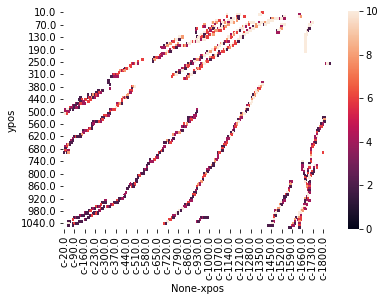

In [22]:
HeatMap = sb.heatmap(matrix, vmin=0, vmax=10, square = False)
#cmap = 'blues', linewidth = 0.3

In [2]:
figure = HeatMap.get_figure()    
figure.savefig('HeatMap.png', dpi=400)

NameError: name 'HeatMap' is not defined

TO DO : 

Compléter la df matrix pour éviter les trous de manière à obtenir plus de X que de Y et respecter les dimensions de 
l'image d'origine